## EXPERIMENTOS CON ICA (SEPARANDO SPOTS)

En este Notebook se hace una serie de experimentos con los parámetros del método ICA aplicado sobre la señal de EEG filtrada.

IMPORT MODULES

In [1]:
import mne
from TFG_utils import (returnFiles, take_vmrk_files, take_vhdr_files, take_eeg_files, plot_freq_response, 
plot_PSD, plot_eeg_channel_corrected, plot_residual_PSD, plot_spots, Get_Start_End_mrk, Get_spot_start_samples)
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from sklearn.decomposition import PCA

In [2]:
print('MNE version:',mne.__version__)
verbose= False

MNE version: 0.20.7


In [3]:
#%matplotlib qt
#%matplotlib notebook

#### COLLECTING DATA

In [4]:
foldername = 'EEG_folders'
EEG_files= returnFiles(foldername)

vmrk_files= take_vmrk_files(EEG_files)
vhdr_files= take_vhdr_files(EEG_files)
eeg_files= take_eeg_files(EEG_files)

i= 3 # Choosing EEG recording to use

vmrk_filename= vmrk_files[i]
vhdr_filename= vhdr_files[i]
eeg_filename= eeg_files[i]

raw_eeg = mne.io.read_raw_brainvision(vhdr_files[i],verbose=verbose).load_data(verbose=verbose)
info= raw_eeg.info
fs= int(info['sfreq'])

#Selecting channel to represent:
n_channels=31
ch = 2 #Channel F3
#ch = 28 #Channel F4
#ch = 3 #Channel F7
#ch = 29 #Channel F8

subject= eeg_filename[-8:-4]
print('Sujeto:',subject)
print('Canal:', info['ch_names'][ch])

Sujeto: 2900
Canal: F3


In [5]:
spots_times_sec = [0, 60, 120, 180, 226, 287, 347] # Time (sec) at which each spot begins
ini= int(60)*int(fs) #samples of 1st min of basal activity
start_end=Get_Start_End_mrk(vmrk_files[i]) # markers of the spots: start and end
spots_time=Get_spot_start_samples(start_end,fs, spots_times_sec) # Time (samples) at which each spot begins

#### FILTERING DATA

In [6]:
f1,f2=(1,30)
eeg_filtered= raw_eeg.copy().set_montage("standard_1020", verbose= verbose)
eeg_filtered.filter(l_freq=f1, h_freq=f2, filter_length='auto', method='fir',fir_window='hamming', 
                      fir_design='firwin', verbose= verbose)
eeg_filtered.notch_filter([50,100,150], filter_length='auto', method='fir', fir_window='hamming', fir_design='firwin', verbose=None)

data,times= eeg_filtered[:]

#### DIVIDING EEG SIGNAL INTO SPOTS

In [7]:
ba=[]
sp1=[]
sp2=[]
sp3=[]
sp4=[]
sp5=[]
sp6=[]
sp7=[]

for ch in range(len(info['ch_names'])):
    ba.append(data[ch, :spots_time[0]]) # Basal activity
    sp1.append(data[ch, spots_time[0]:spots_time[1]]) #1st spot
    sp2.append(data[ch, spots_time[1]:spots_time[2]]) #2nd spot
    sp3.append(data[ch, spots_time[2]:spots_time[3]]) #3rd spot
    sp4.append(data[ch, spots_time[3]:spots_time[4]]) #4th spot
    sp5.append(data[ch, spots_time[4]:spots_time[5]]) #5th spot
    sp6.append(data[ch, spots_time[5]:spots_time[6]]) #6th spot
    sp7.append(data[ch, spots_time[6]:]) #7th spot

ba = mne.io.RawArray(ba, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp1 = mne.io.RawArray(sp1, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp2 = mne.io.RawArray(sp2, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp3 = mne.io.RawArray(sp3, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp4 = mne.io.RawArray(sp4, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp5 = mne.io.RawArray(sp5, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp6 = mne.io.RawArray(sp6, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)
sp7 = mne.io.RawArray(sp7, info, verbose=verbose).set_montage("standard_1020", verbose= verbose)

# ICA

There are different methods for applying ICA algorithm: fastICA, infomax, picard (doesn't work).

In [8]:
n_components=10

# TODOS picks=['Fp1','Fz','F3','F7','FT9','FC5','FC1','C3','T7','TP9','CP5','CP1','Pz','P3','P7','O1','Oz','O2','P4','P8','TP10','CP6','CP2','C4','T8','FT10','FC6','FC2','F4','F8','Fp2']
#exlcude: ,,'O1','Oz','O2'
#reject = dict(eeg=40e-2)
#picks = mne.pick_types(info, meg=False, eeg=True, eog=False,stim=False, exclude=['C3','CP5','CP1'])
#decim = 3

#### Spot 1

In [9]:
#sp1.plot(scalings={"eeg": 75e-5},title='Before ICA (spot 1)', verbose=verbose,n_channels=n_channels)
#plt.show()
 
#sp1.plot_psd(fmax=160,proj=True, color='tab:orange', show=False, average=True,estimate='power')
#plt.title('Before ICA PSD (spot 1)')
#plt.show()

In [10]:
#sp1_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp1, picks=picks, decim=decim, reject=reject)
#sp1_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp1, picks=picks)
sp1_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp1)

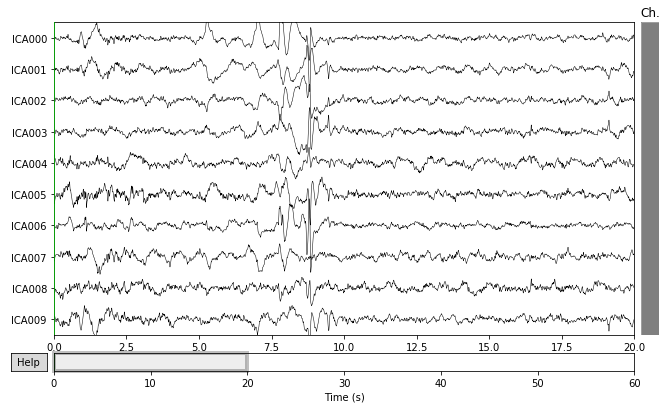

In [11]:
#%matplotlib qt
#%matplotlib notebook
sp1_ica.plot_sources(sp1)
plt.show()

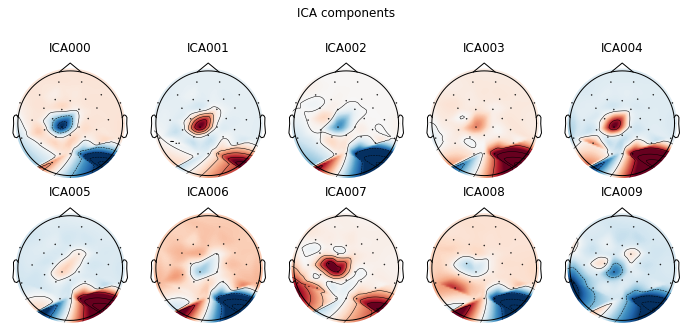

In [12]:
sp1_ica.plot_components()
plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


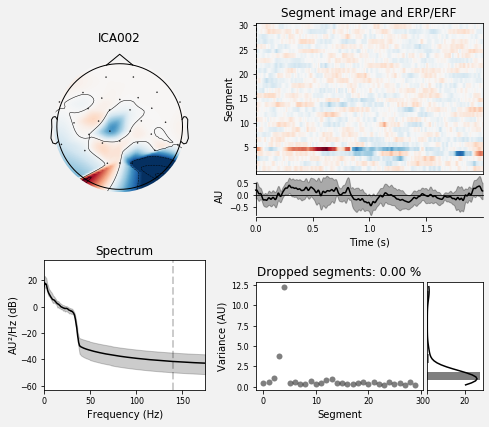

In [13]:
sp1_ica.plot_properties(sp1,picks=[2])
plt.show()

In [ ]:
sp1_ica.plot_overlay(sp1, exclude=[2])
plt.show()

EXCLUDE

In [ ]:
sp1_ica.exclude = [2]
sp1_corrected = sp1.copy()
sp1_ica.apply(sp1_corrected)
sp1_corrected.plot(scalings={"eeg": 75e-5},title='After ICA (spot 1)', verbose=verbose,n_channels=n_channels)
plt.show()

#### Spot 2

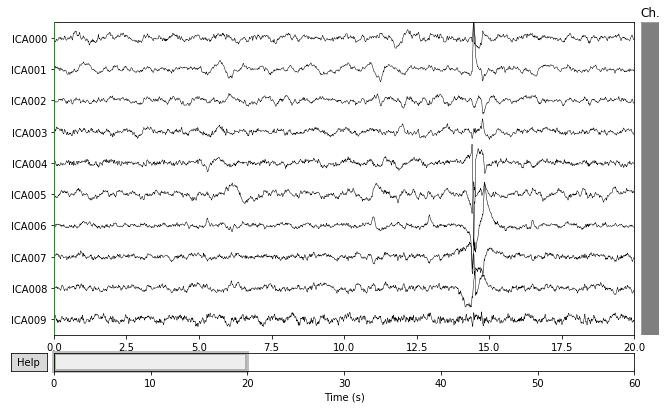

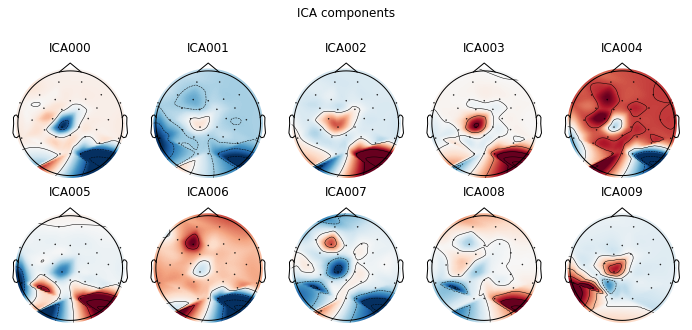

In [14]:
sp2_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp2)
sp2_ica.plot_sources(sp2)
plt.show()
sp2_ica.plot_components()
plt.show()

#### Spot 3

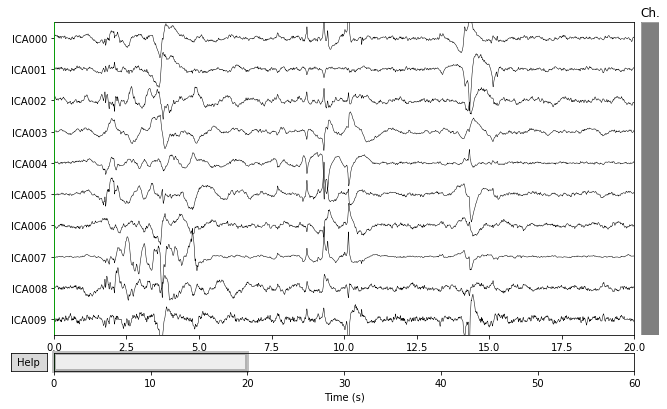

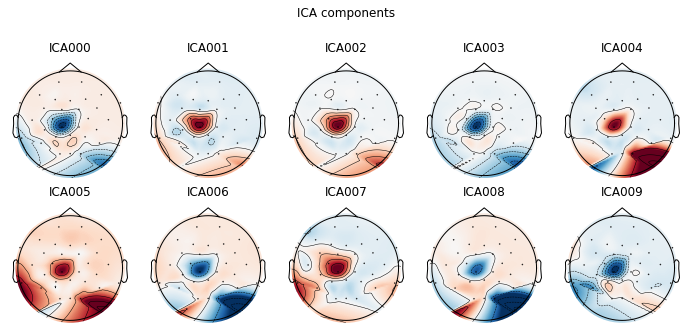

In [15]:
sp3_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp3)
sp3_ica.plot_sources(sp3)
plt.show()
sp3_ica.plot_components()
plt.show()

#### Spot 4

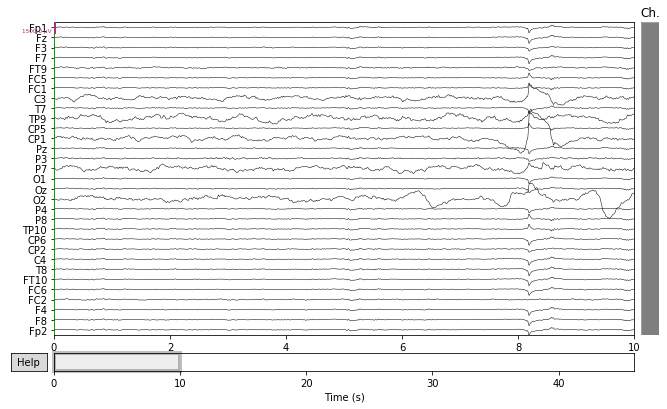

In [16]:
sp4.plot(scalings={"eeg": 75e-5},title='Before ICA (spot 4)', verbose=verbose,n_channels=n_channels)
plt.show()

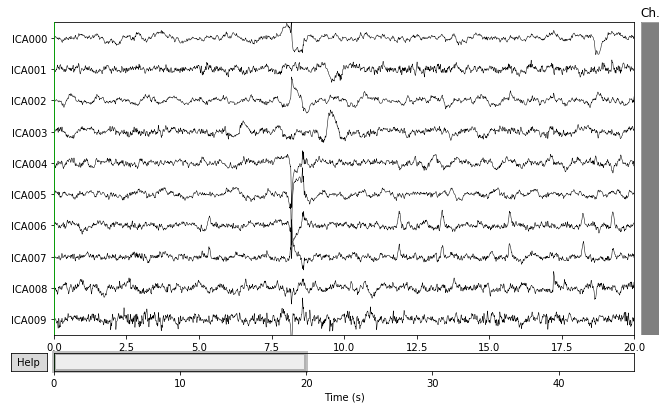

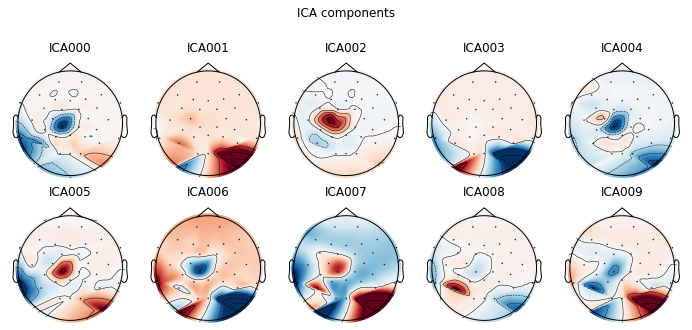

In [17]:
sp4_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp4)
sp4_ica.plot_sources(sp4)
plt.show()
sp4_ica.plot_components()
plt.show()

Transforming to ICA space (10 components)
Zeroing out 3 ICA components


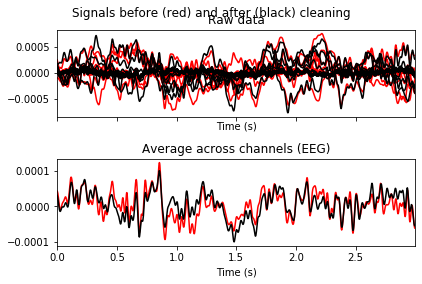

In [18]:
sp4_ica.plot_overlay(sp4, exclude=[6,7,2])
plt.show()

Transforming to ICA space (10 components)
Zeroing out 3 ICA components


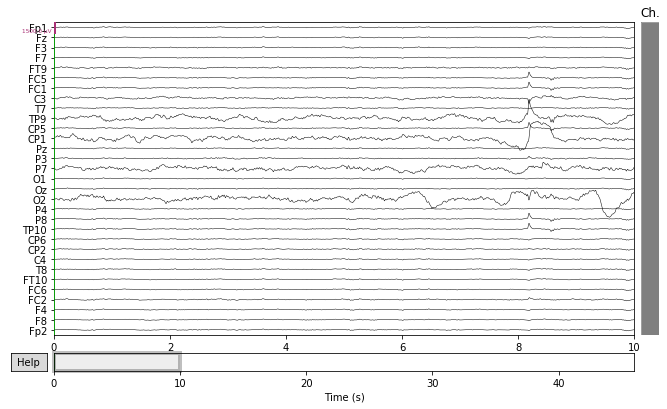

In [19]:
#EXCLUDE
sp4_ica.exclude = [6,7,2]
sp4_corrected = sp4.copy()
sp4_ica.apply(sp4_corrected)
sp4_corrected.plot(scalings={"eeg": 75e-5},title='After ICA (spot 4)', verbose=verbose,n_channels=n_channels)
plt.show()

#### Spot 5

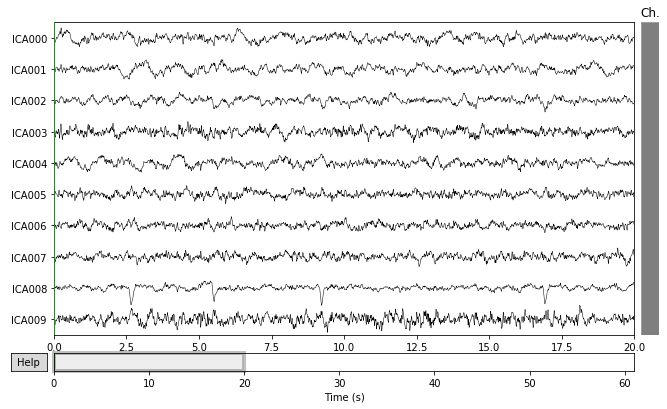

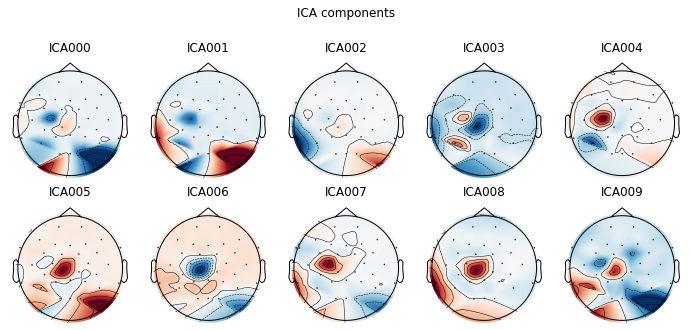

In [20]:
sp5_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp5)
sp5_ica.plot_sources(sp5)
plt.show()
sp5_ica.plot_components()
plt.show()

#### Spot 6

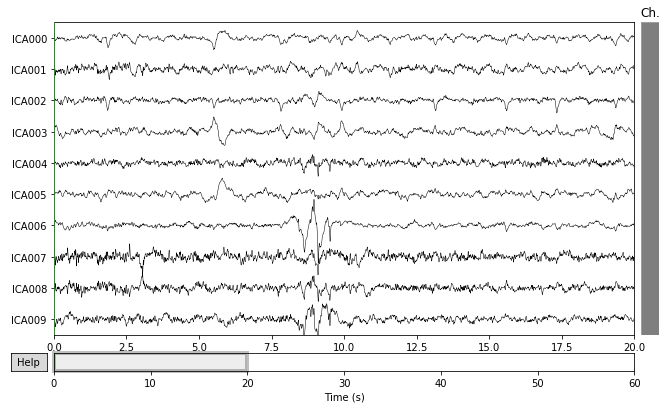

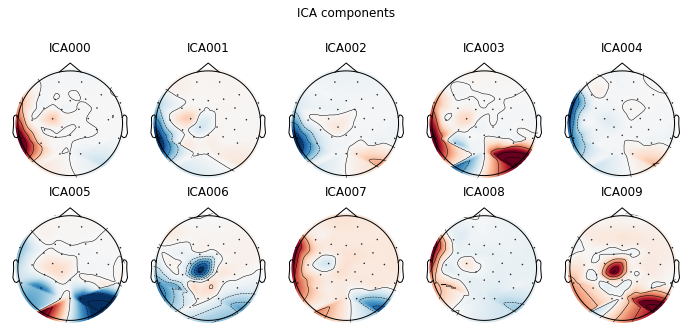

In [21]:
sp6_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp6)
sp6_ica.plot_sources(sp6)
plt.show()
sp6_ica.plot_components()
plt.show()

#### Spot 7

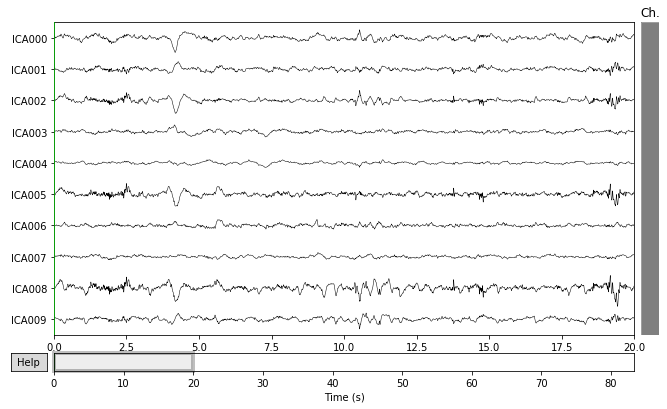

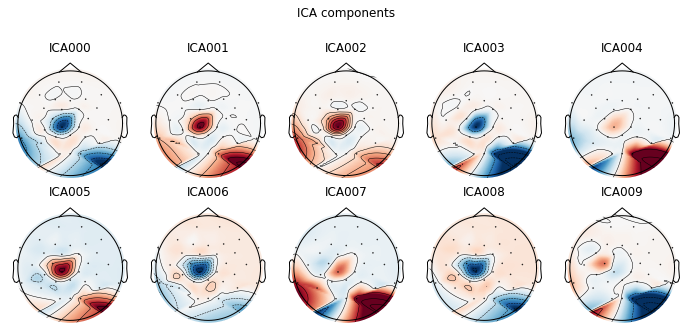

In [22]:
sp7_ica = mne.preprocessing.ICA(n_components=n_components, method='fastica', random_state=1, verbose=verbose, fit_params=dict(tol=5)).fit(sp7)
sp7_ica.plot_sources(sp7)
plt.show()
sp7_ica.plot_components()
plt.show()

In [23]:
plt.close('all')